## CASE STUDY -  BREAST CANCER CLASSIFICATION

## Problem Statement

### Import modules and dataset 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [13]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [23]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'],['target']))

In [24]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Data Visualization

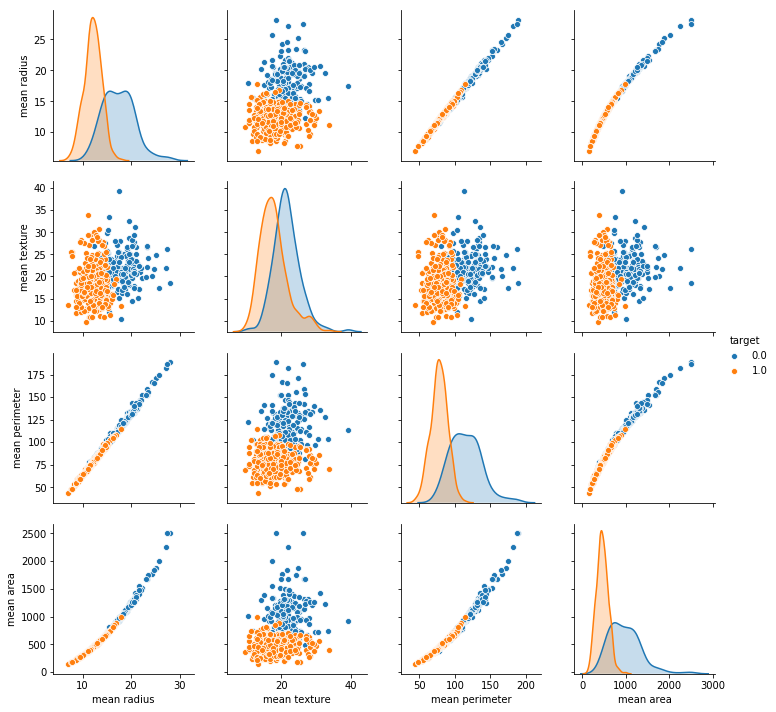

In [26]:
sns.pairplot(df_cancer,hue = 'target', vars = ['mean radius','mean texture','mean perimeter','mean area']);
#Add hue to pairplot and it will show the correlation between two features based on hue 

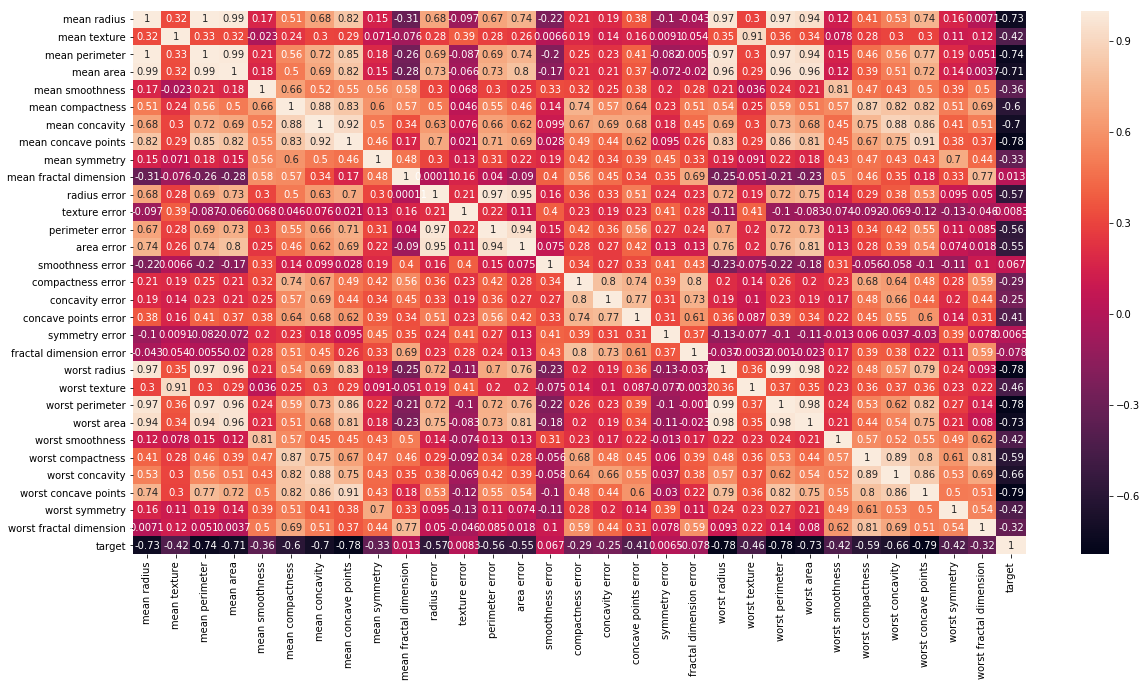

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True);

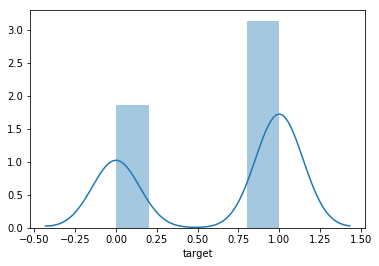

In [31]:
sns.distplot(df_cancer.target)

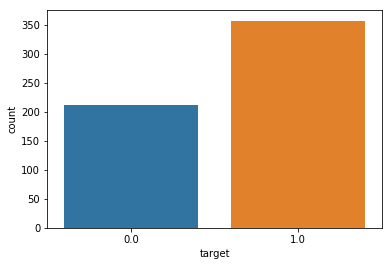

In [32]:
sns.countplot(df_cancer.target)

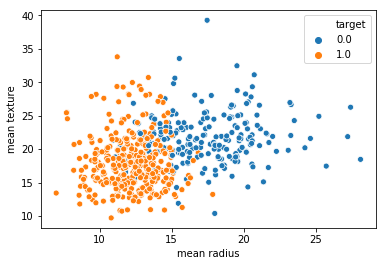

In [34]:
sns.scatterplot(x='mean radius',y='mean texture',hue='target',data=df_cancer);

### Model Building 

In [37]:
X = df_cancer.drop('target',axis=1)
y= df_cancer['target']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [44]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(381, 30)

(381,)

(188, 30)

(188,)

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

model_svc = SVC(gamma='auto')
model_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
y_pred = model_svc.predict(X_test)

In [52]:
svm_cm = confusion_matrix(y_test,y_pred)

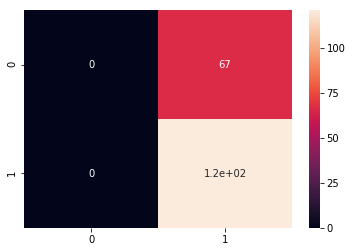

In [56]:
sns.heatmap(svm_cm,annot=True);

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        67
         1.0       0.64      1.00      0.78       121

   micro avg       0.64      0.64      0.64       188
   macro avg       0.32      0.50      0.39       188
weighted avg       0.41      0.64      0.50       188



C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


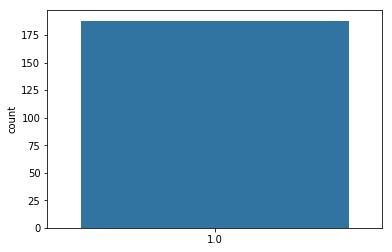

In [59]:
sns.countplot(y_pred)

This means the model predicted all the targets as benign with an accuracy very low as 41%.This means there is improvement that needs to be done to dataset and also to the model.For this one option that we can do is scalethe features.

X_scale = (X - Xmin)/(Xmax - Xmin)

### SCALING X  - First method

In [64]:
from sklearn.preprocessing import scale

In [68]:
X_train_scaled = scale(X_train)

In [69]:
X_train_scaled

array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
         0.51844283,  0.98925483],
       [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
        -0.63236707, -0.11469617],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
         1.02587412, -0.03369823],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
        -0.67979055, -1.26509354],
       [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
         0.45995387,  1.24414347],
       [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
        -0.30672581, -0.8357478 ]])

In [70]:
X_test_scaled = scale(X_test)
X_test_scaled

array([[-0.45292441, -0.19214799, -0.42928006, ..., -0.20791229,
         0.14903124,  0.14487862],
       [ 1.45260534,  0.4230057 ,  1.37249228, ...,  0.94248977,
        -0.63989262, -1.00553077],
       [ 0.42768362,  0.00760671,  0.444268  , ...,  0.53375519,
        -0.152566  , -0.24426958],
       ...,
       [-0.08772242,  0.31404859, -0.04315571, ...,  0.59618011,
         0.45914818,  1.61416594],
       [ 0.13611106,  1.25834355,  0.19462229, ...,  0.07448615,
         0.44381272,  0.93275732],
       [-0.13779044, -1.15460247, -0.15928971, ...,  0.19784968,
         0.08598549, -0.64885595]])

In [71]:
model_svc.fit(X_train_scaled,y_train)
y_pred_scaled = model_svc.predict(X_test_scaled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [99]:
cm = confusion_matrix(y_test,y_pred_scaled)

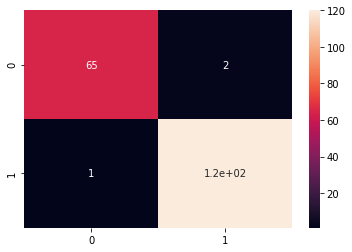

In [100]:
sns.heatmap(cm,annot=True)

In [101]:
print(classification_report(y_test,y_pred_scaled))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        67
         1.0       0.98      0.99      0.99       121

   micro avg       0.98      0.98      0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [82]:
y_test.value_counts()

1.0    121
0.0     67
Name: target, dtype: int64

In [95]:
count = np.unique(y_pred_scaled,return_counts=True) # As y_pred_scaled is an ndarray rather than a DF , we cannot use valuecounts
print(np.stack(count).T) 

[[  0.  66.]
 [  1. 122.]]


### SCALING X - Second Method

In [111]:
X_train_min = X_train.min()
X_train_max = X_train.max()
range_X_1 = X_train_max - X_train_min

In [112]:
range_X_2 = (X_train - X_train_min).max()

In [ ]:
#Using both the above formulaes for getting range gives the same result.so both are good

In [121]:
X_train_scaled_  = (X_train - X_train_min)/range_X_2
X_train_scaled_

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,0.380479,0.073723,0.386416,0.243070,0.626326,0.466132,0.476101,0.545229,0.426588,0.436605,...,0.369564,0.133795,0.358446,0.217944,0.523879,0.358552,0.645340,0.662917,0.325448,0.389624
407,0.252657,0.394319,0.244649,0.147644,0.128853,0.218410,0.143533,0.092793,0.220502,0.235468,...,0.209122,0.399520,0.188806,0.104754,0.093110,0.176277,0.203454,0.203229,0.181944,0.224398
56,0.564131,0.299628,0.550514,0.421179,0.424125,0.367509,0.309981,0.447018,0.400427,0.203243,...,0.638184,0.429638,0.587718,0.476727,0.591688,0.350583,0.429378,0.758708,0.388725,0.236521
497,0.234047,0.257017,0.229095,0.132884,0.265338,0.194918,0.084560,0.117744,0.191671,0.221146,...,0.196696,0.328358,0.194855,0.095201,0.337951,0.239359,0.224485,0.382075,0.289769,0.182859
301,0.233557,0.344268,0.228953,0.129108,0.218059,0.280871,0.160028,0.154026,0.327816,0.263901,...,0.174768,0.294510,0.171013,0.081307,0.173168,0.200846,0.210759,0.276669,0.220777,0.191590
550,0.155199,0.398039,0.143907,0.081567,0.116959,0.078385,0.000000,0.000000,0.263748,0.200505,...,0.108983,0.339819,0.099588,0.046819,0.137441,0.043339,0.000000,0.000000,0.176030,0.092235
289,0.180175,0.310450,0.170020,0.096799,0.244028,0.105130,0.056209,0.108002,0.451682,0.201980,...,0.134566,0.376333,0.126074,0.058481,0.222749,0.069457,0.083341,0.225073,0.335502,0.126314
277,0.544542,0.347311,0.517694,0.399725,0.264843,0.135128,0.187910,0.290408,0.204485,0.000000,...,0.412324,0.327292,0.378781,0.251191,0.313890,0.090396,0.244631,0.469521,0.197516,0.019752
49,0.284000,0.425769,0.275186,0.167596,0.247894,0.197247,0.111317,0.168191,0.342766,0.152064,...,0.236532,0.527719,0.226272,0.117904,0.254830,0.151376,0.252601,0.465167,0.257441,0.119786
234,0.091875,0.209672,0.084689,0.046855,0.219348,0.073591,0.038707,0.082853,0.205019,0.296335,...,0.066954,0.190299,0.057191,0.027863,0.504192,0.067321,0.079267,0.262046,0.234969,0.226687


In [116]:
X_test_min = X_test.min()
range_X_test = (X_test - X_test_min).max()
X_test_scaled_ = (X_test - X_test_min)/range_X_test

In [117]:
model_svc.fit(X_train_scaled_,y_train)
y_pred_scaled_ = model_svc.predict(X_test_scaled_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

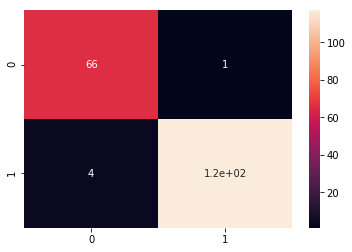

In [119]:
cm2= confusion_matrix(y_test,y_pred_scaled_)
sns.heatmap(cm2,annot=True)

In [120]:
print(classification_report(y_test,y_pred_scaled_))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        67
         1.0       0.99      0.97      0.98       121

   micro avg       0.97      0.97      0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188



In [ ]:
#Just checking if the scaling was proper 

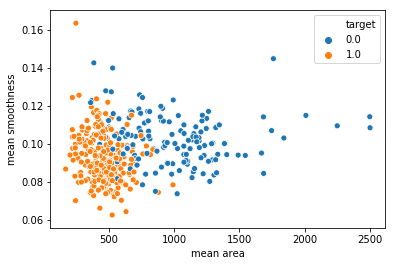

In [122]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

In [123]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train['mean smoothness'], hue = y_train)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

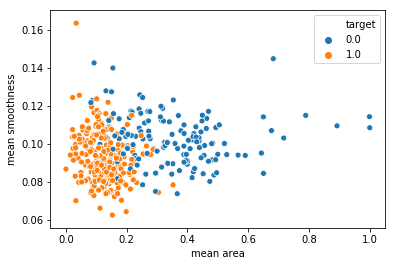

In [124]:
sns.scatterplot(x = X_train_scaled_['mean area'], y = X_train['mean smoothness'], hue = y_train)

### Improving Model by GridSearch

In [125]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

In [132]:
from sklearn.model_selection import GridSearchCV
model_grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4,cv=None)

In [133]:
model_grid.fit(X_train_scaled,y_train)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ...... C=0.1, gamma=0.1, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.905511811023622, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9126984126984127, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [134]:
model_grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [135]:
y_pred_grid = model_grid.predict(X_test_scaled)

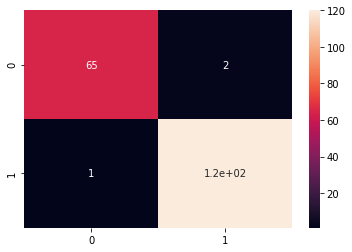

In [136]:
cm_grid = confusion_matrix(y_test,y_pred_grid)
sns.heatmap(cm_grid,annot=True)

In [137]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        67
         1.0       0.98      0.99      0.99       121

   micro avg       0.98      0.98      0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

